- Basic setup to simulate trajectories with 3 parameters (drift, bound, starting point) using Euler Mayurama  method
	- Obtain histograms and psychometrics
	- Compare to analytic solutions, explore the error of the approximation with dt
	- Explore dependence of histograms and psychometrics with parameter values
- Add time varying bound, variability in parameters
- Explore race models

- "Optogenetic manipulations"
	- "Sensory neurons" vs "Integrator neurons"
	- Bound "deletion"
        - Other ways?

- History effects
	- Explore updates on starting point and drifts
	- Also post error slowing (increase bounds after errors)

In [312]:
# @title Import packages
import numpy as np
import matplotlib.pyplot as plt
import importlib
import random

# import all functions defined in ddm.py
import ddm

# set the font size of plots
font = {'size'   : 14}
plt.rc('font', **font)

In [313]:
# Reload all functions from the ddm.py file
# use after making changes in ddm.py.
importlib.reload(ddm)

<module 'ddm' from '/Users/marcocolnaghi/Documents/INCDP/Classes/DecisionMaking/indp22-ddm-simulation-project/code/ddm.py'>

In [314]:
colors = ['#2662E4', '#F02D3A']

In [315]:
# Define DDM parameters
mu = 0.5 # drift
theta = 1 # bound
z = 0 # starting point
sigma = 1 # noise std
b = 0 # time varying bound

# Define simulation parameters
n_trials = 1000
dt = .001
T = 10

In [319]:
# Run single Simulation
S, hits, errs, thetas, traj = ddm.sim_ddm(mu, theta, b, z, sigma, n_trials, dt, T)

In [320]:
bins = np.linspace(0, 6, 30)
t = np.arange(0, T, dt)


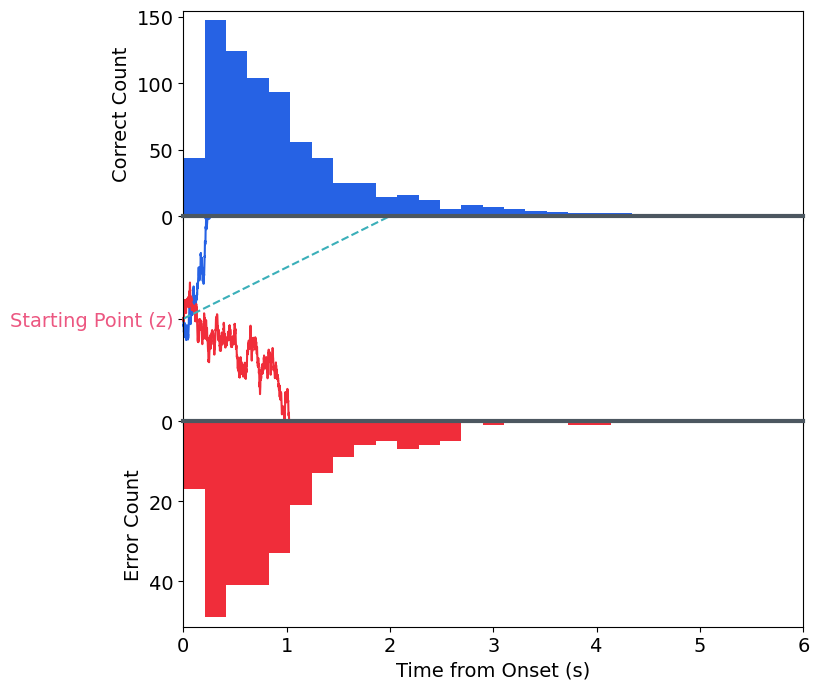

In [321]:
# Plot Trajectories with RT histograms
ddm.plot_trajectories_and_RT(S, hits, errs, traj, mu, t, bins, colors)


In [26]:
# Run DDM simulations for different drifts
n_mu = 21
mu_list = 2*np.linspace(-1, 1, n_mu)
z_list = 0*np.concatenate((-np.ones((10,)),\
                              np.zeros((1,)),\
                              np.ones((10,))))
b = 0.0
# Preallocate results
S_list = []
hits_list = []
errs_list = []
for i, mu in enumerate(mu_list):
    z = z_list[i]
    # Simulate trajectories
    S, hits, errs, thetas, traj = ddm.sim_ddm(mu, theta, b, z, sigma, n_trials, dt, T)
    S_list.append(S)
    hits_list.append(hits)
    errs_list.append(errs)

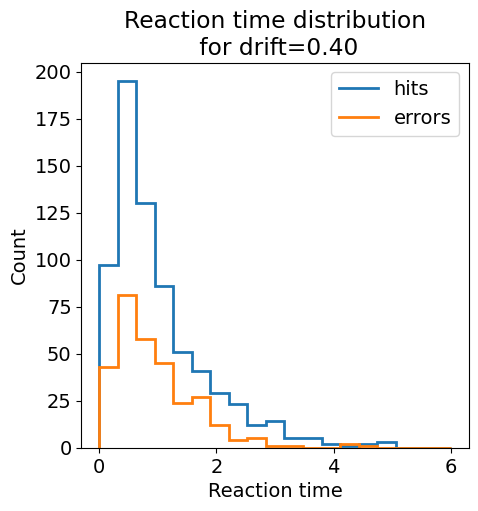

In [27]:
# Plot the reaction time distributions for the hit and error trials, for example mu
mu_i = 12 # example mu
bins = np.linspace(0, 6, 20)

hits = S_list[mu_i][hits_list[mu_i],1]
errs = S_list[mu_i][errs_list[mu_i],1]

ddm.plot_rt_hist(hits, errs, bins)
plt.title('Reaction time distribution\n for drift={:.2f}'.format(mu_list[mu_i]))
plt.show()

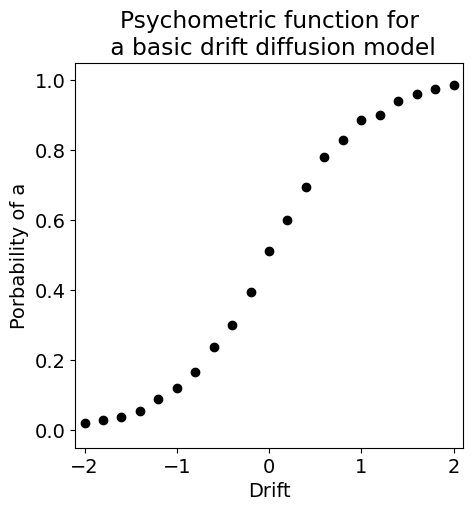

In [28]:
# Plot a psychometric curve
prob_a = ddm.calc_psychometric(S_list, mu_list)
ddm.plot_psychometric(prob_a, mu_list)
plt.title('Psychometric function for\n a basic drift diffusion model')
plt.show()

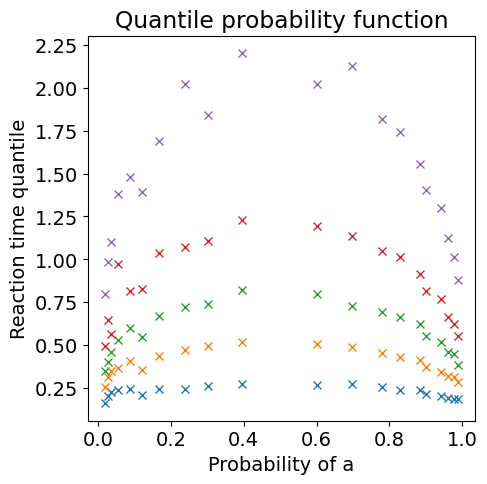

In [29]:
# Plot the quantile probability function
ddm.plot_quantile_prob_func(S_list, hits_list, errs_list, mu_list, prob_a)
plt.title('Quantile probability function')
plt.show()

In [30]:
# Plot different Bounds
S, hits, errs, thetas, traj = ddm.sim_ddm(mu, theta, b, z, sigma, n_trials, dt, T)

In [142]:
# Run DDM simulations for different drifts
n_bs = 4
bs_list = np.linspace(0.02,0, n_bs)
z_list = 0*np.concatenate((-np.ones((10,)),\
                              np.zeros((1,)),\
                              np.ones((10,))))
mu = 0.1;
# Preallocate results
S_list = []
hits_list = []
errs_list = []
t = np.arange(0, T, dt)
n_t = t.size
trajs = np.zeros((n_trials, n_t, n_bs)); 

for i, b in enumerate(bs_list):
    z = z_list[i]
    # Simulate trajectories
    S, hits, errs, thetas, trajs[:,:,i] = ddm.sim_ddm(mu, theta, b, z, sigma, n_trials, dt, T)
    
    S_list.append(S)
    hits_list.append(hits)
    errs_list.append(errs)
    

In [143]:
thetas = theta/(1+(b/dt*np.linspace(0, 1, n_t)))

In [144]:
colorbounds = ['#6494AA', '#90A959', '#F1A53A', '#A63D40']

In [145]:
0:10:ranget

SyntaxError: illegal target for annotation (1908862540.py, line 1)

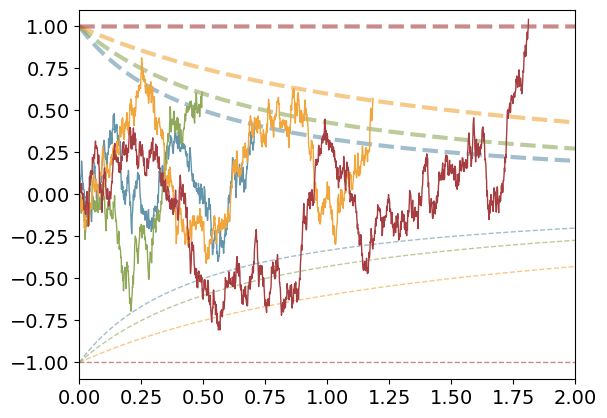

In [322]:
trialID = 34
#fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(8,8))

for i, b in enumerate(bs_list):
    thetas = theta/(1+(b/dt*np.linspace(0, 1, n_t)))
    ranget = np.sum(~np.isnan(np.squeeze(trajs[hits_list[i][0][trialID],:,i])))
    plt.plot(t, thetas, color=colorbounds[i], linestyle='--', linewidth=3, alpha=0.6)
    plt.plot(t, -thetas, color=colorbounds[i], linestyle='--', linewidth=1, alpha=0.6)

    #plt.annotate('annotate', xy=(2, 1), xytext=(3, 4))
    plt.plot(t[np.arange(0,ranget,1)],trajs[hits_list[i][0][trialID],np.arange(0,ranget,1),i], color=colorbounds[i], linewidth=1)
    plt.xlim([0, 2])
    plt.ylim([-1.1,1.1])

In [36]:
bins = np.linspace(0, 6, 30)

In [ ]:
plt.hist(S[:,1],bins);
plt.xlabel('Reaction Time (s)');
plt.ylabel('Trial Count');


In [ ]:
correct = np.where(S[:,0]==1)[0]
incorrect = np.where(S[:,0]==0)[0]

traj[trialExample[1],:]

In [ ]:
trialExample = [correct[4], incorrect[5]]
ranget = [np.sum(~np.isnan(traj[trialExample[0],:])), np.sum(~np.isnan(traj[trialExample[1],:]))]

fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(10,10))

#axes[0].subplots_adjust(hspace=0)
axes[0].hist(S[correct,1], bins,density=True, color='teal');

axes[1].plot(t[0:ranget[0]], traj[trialExample[0],0:ranget[0]].T,color='teal');
axes[1].plot(t[0:ranget[1]], traj[trialExample[1],0:ranget[1]].T,color='orange');
axes[1].set_ylim([-1, 1])
axes[2].hist(S[incorrect,1], bins, density=True,color='orange');
axes[2].invert_yaxis()
plt.subplots_adjust(hspace=0)

#plt.xlabel('Reaction Time (s)');
#plt.ylabel('Trial Count');

In [ ]:
plt.plot(traj[incorrect,:].T);

In [ ]:
ds_traj = traj[:, np.arange(0,n_t,50)]

In [ ]:
plt.plot(ds_traj[incorrect,:].T);

In [ ]:
histbins = np.linspace(-1,1,20)
plt.hist(ds_traj[incorrect,1].T, histbins, alpha = 0.5);
plt.hist(ds_traj[incorrect,6].T, histbins, alpha = 0.5);
plt.hist(ds_traj[incorrect,11].T, histbins, alpha = 0.5);
plt.hist(ds_traj[incorrect,16].T, histbins, alpha = 0.5);